## Training and predicting stock prices(for MSFT) using LSTM(Long Short Term Memory)

### Dataset : Historical stock price data from year 2010 to 2016


In [1]:
import numpy as np # linear algebra
import pandas as pd 
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [2]:
stock_df =  pd.read_csv('prices.csv', header=0)
stock_df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
msft = stock_df[stock_df['symbol']=='MSFT']
msft_stock_prices = yahoo.close.values.astype('float32')
msft_stock_prices = yahoo_stock_prices.reshape(1762, 1)
msft_stock_prices.shape

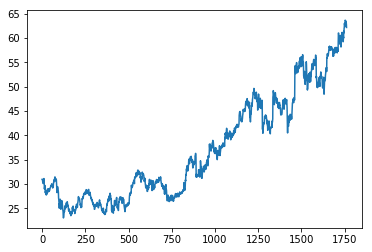

In [10]:
plt.plot(msft_stock_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
msft_stock_prices = scaler.fit_transform(msft_stock_prices)

In [11]:
train_size = int(len(msft_stock_prices) * 0.80)
test_size = len(msft_stock_prices) - train_size
train, test = msft_stock_prices[0:train_size,:], msft_stock_prices[train_size:len(msft_stock_prices),:]
print(len(train), len(test))

1409 353


In [15]:
# converting array of values into a dataset matrix
def create_matrix(dataset, look_backward=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_backward-1):
        a = dataset[i:(i+look_backward), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_backward, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t and Y=t+1
look_backward = 1
trainX, trainY = create_matrix(train, look_backward)
testX, testY = create_matrix(test, look_backward)

In [17]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [41]:
#Buiding Model
model = Sequential()

model.add(LSTM(
    100,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(50))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

Instructions for updating:
Colocations handled automatically by placer.
compilation time :  0.015957117080688477


In [42]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1336 samples, validate on 71 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1336/1336 [==============================] - 1s 1ms/sample - loss: 0.0704 - val_loss: 0.2538
Epoch 2/10
1336/1336 [==============================] - 0s 48us/sample - loss: 0.0422 - val_loss: 0.1427
Epoch 3/10
1336/1336 [==============================] - 0s 53us/sample - loss: 0.0220 - val_loss: 0.0724
Epoch 4/10
1336/1336 [==============================] - 0s 45us/sample - loss: 0.0160 - val_loss: 0.0474
Epoch 5/10
1336/1336 [==============================] - 0s 47us/sample - loss: 0.0129 - val_loss: 0.0296
Epoch 6/10
1336/1336 [==============================] - 0s 56us/sample - loss: 0.0092 - val_loss: 0.0149
Epoch 7/10
1336/1336 [==============================] - 0s 101us/sample - loss: 0.0052 - val_loss: 0.0074
Epoch 8/

[[0.6123142  0.6078702  0.60882545 0.6140904  0.62119776 0.6070214
  0.60468996 0.6099314  0.6146153  0.611447   0.6147355  0.59934115
  0.61046857 0.61297286 0.61683303 0.60684955 0.6033243  0.60198873
  0.6179261  0.61279863 0.60506845 0.60855407 0.60935205 0.60679984
  0.6098429  0.60175496 0.61201966 0.6138274  0.607319   0.60408795
  0.6188137  0.60817784 0.59799844 0.60606295 0.6150855  0.61702853
  0.60890085 0.6080575  0.60758525 0.6142428  0.610763   0.60701853
  0.6159899  0.60570544 0.6193739  0.60626656 0.60134727 0.60505676
  0.60105884 0.6031976 ]]
[[4.5955325e-03 4.5997533e-03 1.7705967e-03 2.3791655e-03 5.1895098e-05
  6.9922172e-03 6.3493545e-03 4.3720035e-03 3.1346851e-03 4.1659027e-03
  2.6549310e-03 1.5314875e-02 3.4286026e-03 5.1333220e-03 2.8439260e-03
  5.5173780e-03 1.2349343e-02 1.1991897e-02 1.1478063e-03 4.6026860e-03
  1.1261298e-02 7.7377837e-03 4.1933428e-03 8.1904847e-03 7.7853343e-03
  1.3384510e-02 5.4985341e-03 7.5444276e-04 9.2119966e-03 5.5546360e-03

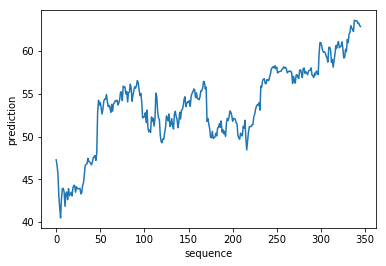

In [54]:
def plot_predictions(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.xlabel("sequence")
    plt.ylabel("prediction")
    plt.show()
    
def predict_sequence(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(lengpredict_sequences_multipleth): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequence(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_predictions(predictions, testY, predict_length)

In [55]:
msft

,date,symbol,open,close,low,high,volume
544,2010-01-04,MSFT,30.620001,30.950001,30.590000,31.100000,38409100.0
1012,2010-01-05,MSFT,30.850000,30.959999,30.639999,31.100000,49749600.0
1480,2010-01-06,MSFT,30.879999,30.770000,30.520000,31.080000,58182400.0
1948,2010-01-07,MSFT,30.629999,30.450001,30.190001,30.700001,50559700.0
2416,2010-01-08,MSFT,30.280001,30.660000,30.240000,30.879999,51197400.0
2884,2010-01-11,MSFT,30.709999,30.270000,30.120001,30.760000,68754700.0
3352,2010-01-12,MSFT,30.150000,30.070000,29.910000,30.400000,65912100.0
3820,2010-01-13,MSFT,30.260000,30.350000,30.010000,30.520000,51863500.0
4288,2010-01-14,MSFT,30.309999,30.959999,30.260000,31.100000,63228100.0
4756,2010-01-15,MSFT,31.080000,30.860001,30.709999,31.240000,79913200.0


In [53]:
trainY

array([0.19576454, 0.19108593, 0.18320614, ..., 0.6040384 , 0.60502344,
       0.5813839 ], dtype=float32)